## Planning Observations for March 2018 ##

First import necessary modules:

In [26]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Read in Catalogs ###

In [109]:
gitpath = '/Users/rfinn/github/'
catalog_path = 'Virgo/tables/'

nsa = fits.getdata(gitpath+catalog_path+'nsa.virgo.fits')
coG = fits.getdata(gitpath+catalog_path+'nsa_CO-Gianluca.virgo.fits')
co = fits.getdata(gitpath+catalog_path+'nsa_CO-HI.virgo.fits')
ha = fits.getdata(gitpath+catalog_path+'nsa_Halpha.virgo.fits')
jmass = fits.getdata(gitpath+catalog_path+'nsa_mstar.virgo.fits')

In [119]:
print sum(coG.CO != '') 
print sum(coG.COdetected == '1')

160
123


In [115]:
print sum(co.CO == 'O')
print sum(co.CO == 'L')

118
42


In [116]:
print sum(co.CO == 'O') + sum(co.CO == 'L')
print sum(co.CO_DETECT == 1)

160
121


In [126]:
co_gal = coG.CO != ''

coflag = coG.COdetected == '1'
HIflag = (co.HImass > -1.)
haflag = (ha.nsa_id > 0)

In [127]:
print 'number of non-detections = ',sum(co_gal & ~coflag)

number of non-detections =  37


In [128]:
def plotpositions():
    plt.figure(figsize=(12,8))
    plt.scatter(nsa.RA,nsa.DEC,s=20,c=jmass.MSTAR,cmap='jet',vmin=7,vmax=11)
    plt.plot(nsa.RA[coflag],nsa.DEC[coflag],'k^',markersize=10,mfc='None')
    plt.plot(nsa.RA[co_gal & ~coflag],nsa.DEC[(co_gal & ~coflag)],'ks',markersize=14,mfc='None')
    plt.plot(nsa.RA[haflag],nsa.DEC[haflag],'kv',markersize=10,mfc='None')
    plt.colorbar(fraction=0.08,label='$log_{10}(M_\star/M_\odot)$')
    plt.gca().invert_xaxis()
    plt.xlabel('RA (deg)',fontsize=20)
    plt.ylabel('DEC (deg)',fontsize=20)

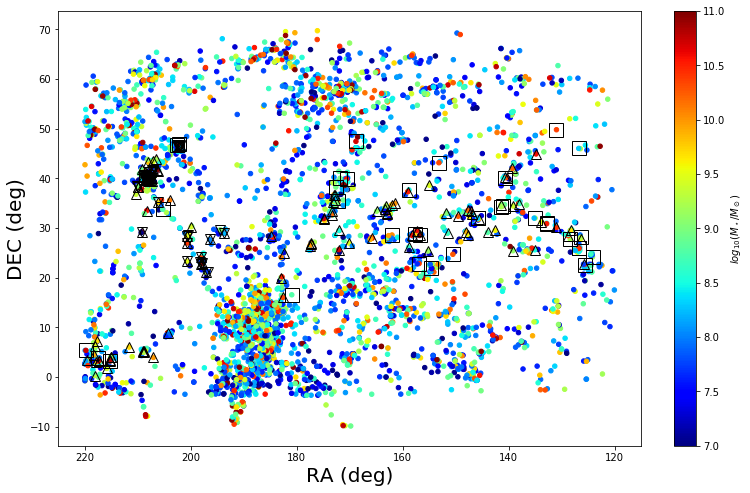

In [129]:
plotpositions()

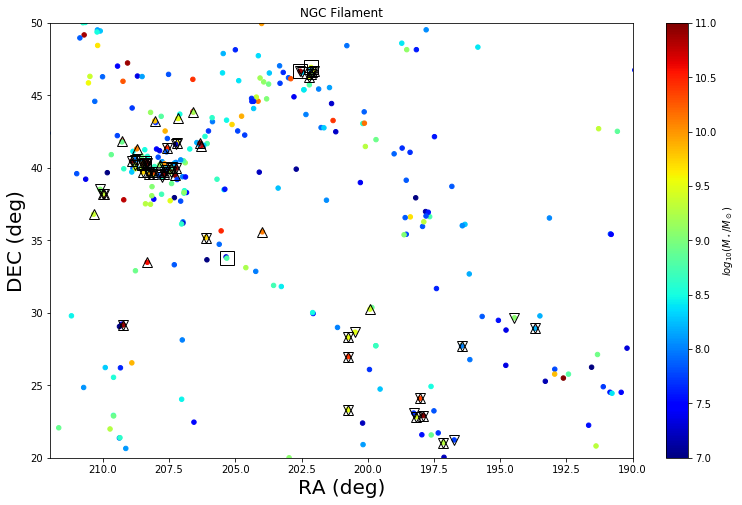

In [130]:
plotpositions()
plt.axis([190,212,20,50])
plt.gca().invert_xaxis()
plt.title('NGC Filament')

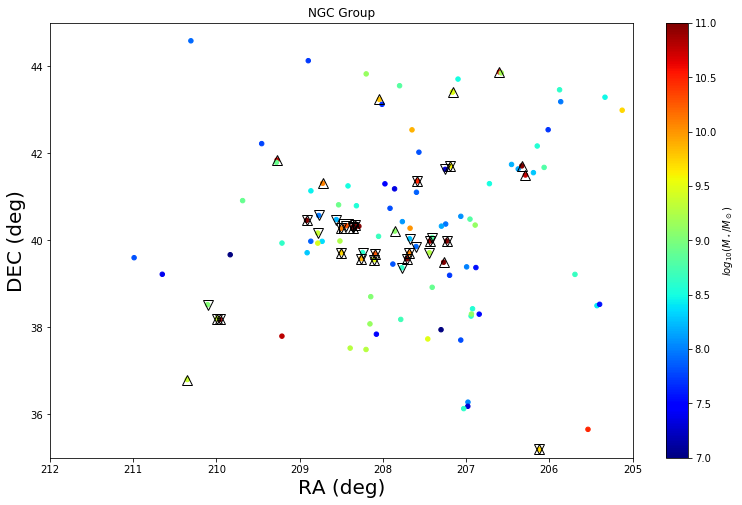

In [131]:
plotpositions()
plt.axis([205,212,35,45])
plt.gca().invert_xaxis()
plt.title('NGC Group')